In [2]:
# too deep: normalization

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# normalize  
mean = np.array([[[[125.30691805, 122.95039414, 113.86538318]]]])
std  = np.array([[[[62.99321928, 62.08870764, 66.70489964]]]])

x_train = (x_train - mean) / std
x_test  = (x_test - mean) / std

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_test, y_test), epochs=50, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       147584    
                                                      

Epoch 36/50
196/196 [==============================] - 8s 41ms/step - loss: 0.0687 - accuracy: 0.9776 - val_loss: 1.5458 - val_accuracy: 0.7581
Epoch 37/50
196/196 [==============================] - 8s 41ms/step - loss: 0.0636 - accuracy: 0.9784 - val_loss: 1.5274 - val_accuracy: 0.7611
Epoch 38/50
196/196 [==============================] - 8s 41ms/step - loss: 0.0644 - accuracy: 0.9793 - val_loss: 1.4148 - val_accuracy: 0.7743
Epoch 39/50
196/196 [==============================] - 8s 41ms/step - loss: 0.0545 - accuracy: 0.9820 - val_loss: 1.5962 - val_accuracy: 0.7680
Epoch 40/50
196/196 [==============================] - 8s 41ms/step - loss: 0.0633 - accuracy: 0.9795 - val_loss: 1.5190 - val_accuracy: 0.7600
Epoch 41/50
196/196 [==============================] - 8s 41ms/step - loss: 0.0641 - accuracy: 0.9797 - val_loss: 1.5063 - val_accuracy: 0.7658
Epoch 42/50
196/196 [==============================] - 8s 41ms/step - loss: 0.0635 - accuracy: 0.9793 - val_loss: 1.5253 - val_accuracy:

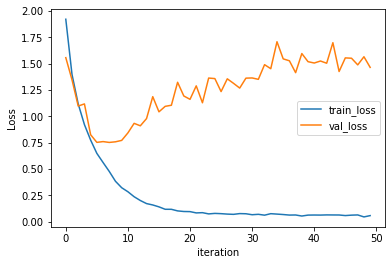

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

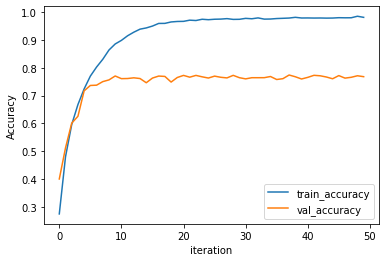

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()